<a href="https://colab.research.google.com/github/anikdem01/blood_glucose_prediction/blob/main/lstm_timeseries_glucose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

### Single Variable

In [ ]:
train_csv_path = '/content/drive/MyDrive/ML/lstm_timeseries_glucose/brist1d/train.csv'
test_csv_path = '/content/drive/MyDrive/ML/lstm_timeseries_glucose/brist1d/test.csv'
sub_csv_path = '/content/drive/MyDrive/ML/lstm_timeseries_glucose/brist1d/sample_submission.csv'

In [ ]:
df_train = pd.read_csv(train_csv_path, header=0, index_col=0)
# df_sub = pd.read_csv(sub_csv_path)

<ipython-input-4-e58e9e402bda>:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(train_csv_path, header=0, index_col=0)


In [ ]:
# X = df_train.iloc[:8459, 2:74]
# y = df_train.iloc[:8459, -1:] # 'bg+1:00'
# z = df_test.iloc[:244, 2:74]

X = df_train.iloc[:, 2:74] # bg-5:55 to bg+0:00
y = df_train.iloc[:, -1:] # bg+1:00

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [ ]:
TRAIN = 140000
VAL = 20000
X_train, y_train = X[:TRAIN], y[:TRAIN]
X_val, y_val = X[TRAIN:TRAIN+VAL], y[TRAIN: TRAIN+VAL]
X_test, y_test = X[TRAIN+VAL:], y[TRAIN+VAL:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((140000, 72), (140000, 1), (20000, 72), (20000, 1), (17024, 72), (17024, 1))

In [ ]:
X_train = X_train.reshape(140000, 72, 1)
X_val = X_val.reshape(20000, 72, 1)
X_test = X_test.reshape(17024, 72, 1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

ValueError: cannot reshape array of size 40460000 into shape (140000,72,1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((72, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 12.0668 - root_mean_squared_error: 3.3226 - val_loss: 4.0387 - val_root_mean_squared_error: 2.0097
Epoch 2/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - loss: 4.6563 - root_mean_squared_error: 2.1578 - val_loss: 4.0293 - val_root_mean_squared_error: 2.0073
Epoch 3/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 4.5551 - root_mean_squared_error: 2.1342 - val_loss: 4.1654 - val_root_mean_squared_error: 2.0409
Epoch 4/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 4.5079 - root_mean_squared_error: 2.1231 - val_loss: 4.0168 - val_root_mean_squared_error: 2.0042
Epoch 5/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 4.4742 - root_mean_squared_error: 2.1152 - val_loss: 4.0584 - val_root_mean_squared_error: 2.0146
Epoch 6/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 4.4097 - root_mean_squared_error: 2.0999 - val_loss: 3.8837 - val_root_mean_squared_error: 1.9707
Epoch 7/10
4375/4375 ━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model.keras')

In [ ]:
train_predictions = model.predict(X_train)

4375/4375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step


In [ ]:
train_actual = y_train.values.flatten()
train_predictions = train_predictions.flatten()

train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':train_actual})
train_results

AttributeError: 'numpy.ndarray' object has no attribute 'values'

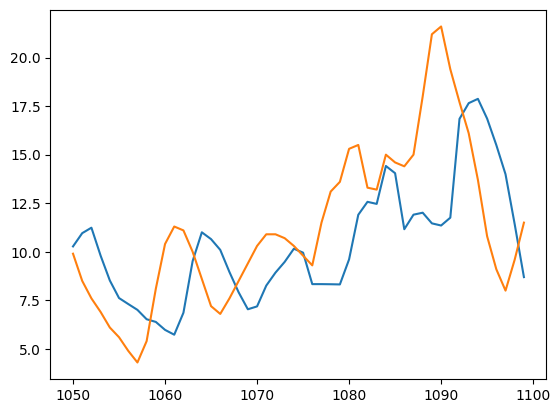

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1050:1100])
plt.plot(train_results['Actuals'][1050:1100])

### Multivariate

In [ ]:
train_csv_path = '/content/drive/MyDrive/ML/lstm_timeseries_glucose/brist1d/train.csv'
test_csv_path = '/content/drive/MyDrive/ML/lstm_timeseries_glucose/brist1d/test.csv'
sub_csv_path = '/content/drive/MyDrive/ML/lstm_timeseries_glucose/brist1d/sample_submission.csv'

In [ ]:
df_train = pd.read_csv(train_csv_path, header=0, index_col=0)
# df_sub = pd.read_csv(sub_csv_path)

<ipython-input-18-e58e9e402bda>:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(train_csv_path, header=0, index_col=0)


In [ ]:
# X = df_train.iloc[:8459, 2:74]
# y = df_train.iloc[:8459, -1:] # 'bg+1:00'
# z = df_test.iloc[:244, 2:74]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
# X2 = imputer.fit_transform(X)
# Z2 = imputer.transform(Z.values)

X_bg = imputer.fit_transform(df_train.filter(like='bg-'))

X_insulin = imputer.fit_transform(df_train.filter(like='insulin'))

X_cals = imputer.fit_transform(df_train.filter(like='cals'))

X_hr = imputer.fit_transform(df_train.filter(like='hr'))

X_time = df_train.filter(like='time')
X_time['time'] = pd.to_datetime(X_time['time'], format='%H:%M:%S')
X_time['time'] = X_time['time'].dt.hour * 60 + X_time['time'].dt.minute
X_time = imputer.fit_transform(X_time)

X = np.hstack((X_bg, X_insulin, X_cals))


y = df_train.iloc[:, -1:].values.flatten() # bg+1:00


X.shape, y.shape

<ipython-input-7-485dc2545122>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_time['time'] = X_time['time'].dt.hour * 60 + X_time['time'].dt.minute


((177024, 216), (177024,))

In [ ]:
TRAIN = 140000
VAL = 20000
X_train, y_train = X[:TRAIN], y[:TRAIN]
X_val, y_val = X[TRAIN:TRAIN+VAL], y[TRAIN: TRAIN+VAL]
X_test, y_test = X[TRAIN+VAL:], y[TRAIN+VAL:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((140000, 216), (140000,), (20000, 216), (20000,), (17024, 216), (17024,))

In [ ]:
X_train = X_train.reshape(140000, 216, 1)
X_val = X_val.reshape(20000, 216, 1)
X_test = X_test.reshape(17024, 216, 1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((140000, 216, 1),
 (140000,),
 (20000, 216, 1),
 (20000,),
 (17024, 216, 1),
 (17024,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

modelm = Sequential()
modelm.add(InputLayer((289, 1)))
modelm.add(LSTM(64))
modelm.add(Dense(8, 'relu'))
modelm.add(Dense(1, 'linear'))

modelm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('modelm.keras', save_best_only=True)
modelm.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
modelm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1589/4375 ━━━━━━━━━━━━━━━━━━━━ 9:17 200ms/step - loss: 9.0704 - root_mean_squared_error: 3.0116

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import load_model
modelm = load_model('modelm.keras')

In [ ]:
train_predictions = modelm.predict(X_train)

4375/4375 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step


In [ ]:
train_actual = y_train.flatten()
train_predictions = train_predictions.flatten()

train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':train_actual})
train_results

,Train Predictions,Actuals
0,13.294211,13.4
1,12.756488,12.8
2,12.379086,15.5
3,12.301527,14.8
4,12.008855,12.7
...,...,...
139995,9.516928,10.0
139996,9.365890,10.8
139997,9.418203,10.5
139998,9.345608,10.0


In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][2000:2050])
plt.plot(train_results['Actuals'][2000:2050])

NameError: name 'train_results' is not defined

### XGBoost

In [ ]:
train_csv_path = '/content/lstm_timeseries_glucose/brist1d/train.csv'
test_csv_path = '/content/lstm_timeseries_glucose/brist1d/test.csv'
sub_csv_path = '/content/lstm_timeseries_glucose/brist1d/sample_submission.csv'

In [ ]:
df_train = pd.read_csv(train_csv_path, header=0, index_col=0)
# df_sub = pd.read_csv(sub_csv_path)

<ipython-input-25-e58e9e402bda>:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(train_csv_path, header=0, index_col=0)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
# X2 = imputer.fit_transform(X)
# Z2 = imputer.transform(Z.values)

X_bg = imputer.fit_transform(df_train.filter(like='bg-'))

X_insulin = imputer.fit_transform(df_train.filter(like='insulin'))

X_cals = imputer.fit_transform(df_train.filter(like='cals'))

X_hr = imputer.fit_transform(df_train.filter(like='hr'))

X_time = df_train.filter(like='time')
X_time['time'] = pd.to_datetime(X_time['time'], format='%H:%M:%S')
X_time['time'] = X_time['time'].dt.hour * 60 + X_time['time'].dt.minute
X_time = imputer.fit_transform(X_time)

X = np.hstack((X_bg, X_insulin, X_cals))


y = df_train.iloc[:, -1:].values.flatten() # bg+1:00


X.shape, y.shape

<ipython-input-4-2a0eacb19d2f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_time['time'] = pd.to_datetime(X_time['time'], format='%H:%M:%S')
<ipython-input-4-2a0eacb19d2f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_time['time'] = X_time['time'].dt.hour * 60 + X_time['time'].dt.minute


((177024, 216), (177024,))

In [ ]:
TRAIN = 140000
VAL = 20000
X_train, y_train = X[:TRAIN], y[:TRAIN]
X_val, y_val = X[TRAIN:TRAIN+VAL], y[TRAIN: TRAIN+VAL]
X_test, y_test = X[TRAIN+VAL:], y[TRAIN+VAL:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((140000, 216), (140000,), (20000, 216), (20000,), (17024, 216), (17024,))

In [ ]:
# X_train = X_train.reshape(140000, 216, 1)
# X_val = X_val.reshape(20000, 216, 1)
# X_test = X_test.reshape(17024, 216, 1)

# X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((140000, 216, 1),
 (140000,),
 (20000, 216, 1),
 (20000,),
 (17024, 216, 1),
 (17024,))

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8
}

modelx = xgb.train(params, train_data, num_boost_round=100)

y_pred = modelx.predict(test_data)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 3.019579756187921


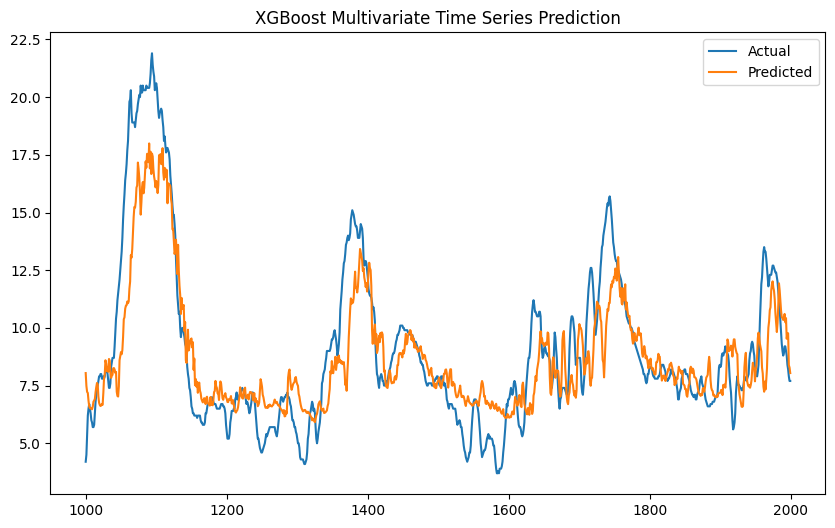

In [ ]:
import matplotlib.pyplot as plt

y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

plt.figure(figsize=(10, 6))

range1, range2 = 1000, 2000
plt.plot(y_test.index[range1:range2], y_test[range1:range2], label='Actual')
plt.plot(y_test.index[range1:range2], y_pred[range1:range2], label='Predicted')
plt.legend()
plt.title('XGBoost Multivariate Time Series Prediction')
plt.show()